In [31]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import datetime
from dateutil.parser import parse
import os,pymssql
import re


In [10]:
data1=pd.read_excel('HS300.xlsx')
data2=pd.read_excel('Small_Medium.xlsx')
data3=pd.read_excel('HSI.xlsx')
data4=pd.read_excel('SP500.xlsx')
data5=pd.read_excel('Gold.xlsx')

In [11]:
data=[data1,data2,data3,data4,data5]

In [13]:
for i in range(len(data)):
    data[i].set_index(['TradingDay'],inplace=True)
    data[i].iloc[:,0]=data[i].iloc[:,0].astype(float)

In [14]:
data[0]

,HS300
TradingDay,
2008-06-30,2791.82
2008-07-01,2698.35
2008-07-02,2699.60
2008-07-03,2760.61
2008-07-04,2741.85
2008-07-07,2882.76
2008-07-08,2901.84
2008-07-09,3015.13
2008-07-10,2973.73


In [15]:
data1_return=np.log((data[0]/data[0].shift(1)),dtype=float)
data2_return=np.log((data[1]/data[1].shift(1)),dtype=float)
data3_return=np.log((data[2]/data[2].shift(1)),dtype=float)
data4_return=np.log((data[3]/data[3].shift(1)),dtype=float)
data5_return=np.log((data[4]/data[4].shift(1)),dtype=float)

In [16]:
data_return=[data1_return,data2_return,data3_return,data4_return,data5_return]

In [182]:
data_all=pd.merge(data_return[0],data_return[1],how='left',left_index=True,right_index=True)
data_all=pd.merge(data_all,data_return[2],how='left',left_index=True,right_index=True)
data_all=pd.merge(data_all,data_return[3],how='left',left_index=True,right_index=True)
data_all=pd.merge(data_all,data_return[4],how='left',left_index=True,right_index=True)


In [184]:
data_all=data_all[1:].fillna(0.000000)

In [185]:
data_all

,HS300,Small_Medium,HSIndex,SP500,Gold
TradingDay,,,,,
2008-07-01,-0.034053,-0.012691,0.000000,0.003829,0.017348
2008-07-02,0.000463,0.007881,-0.018151,-0.018371,0.002161
2008-07-03,0.022348,0.046282,-0.021500,0.001093,-0.013662
2008-07-04,-0.006819,-0.003467,0.008486,0.000000,0.000000
2008-07-07,0.050115,0.046569,0.022579,-0.008421,-0.004956
2008-07-08,0.006597,0.018694,-0.032101,0.016936,-0.005877
2008-07-09,0.038298,0.024723,0.027194,-0.023040,0.005820
2008-07-10,-0.013826,-0.009741,0.000732,0.006965,0.014403
2008-07-11,-0.006826,-0.016780,0.016488,-0.011152,0.019675


#  定义各函数

In [144]:
def get_smart_weight(cov_mat, method='min variance', wts_adjusted=False):
       
    omega = np.matrix(cov_mat.values)  # 协方差矩阵
    
    # 定义目标函数
    def fun1(x):
        return np.matrix(x) * omega * np.matrix(x).T
    
    def fun2(x):
        tmp = (omega * np.matrix(x).T).A1
        risk = x * tmp
        delta_risk = [sum((i - risk)**2) for i in risk]
        return sum(delta_risk)
    
    def fun3(x):
        den = x * omega.diagonal().T
        num = np.sqrt(np.matrix(x) * omega * np.matrix(x).T)
        return num/den    
    
    # 初始值 + 约束条件 
    x0 = np.ones(omega.shape[0]) / omega.shape[0]  
    bnds = tuple((0,None) for x in x0)
    cons = ({'type':'eq', 'fun': lambda x: sum(x) - 1})
    options={'disp':False, 'maxiter':1000, 'ftol':1e-20}    
       
    if method == 'min variance':   
        res = minimize(fun1, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options) 
    elif method == 'risk parity':
        res = minimize(fun2, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    elif method == 'max diversification':
        res = minimize(fun3, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    elif method == 'equal weight':
        return pd.Series(index=cov_mat.index, data=1.0 / cov_mat.shape[0])
            
        # 权重调整
    if res['success'] == False:
        # print res['message']
        pass
    wts = pd.Series(index=cov_mat.index, data=res['x'])
    if wts_adjusted == True:
        wts = wts[wts >= 0.0001]
        return wts / wts.sum() * 1.0
    elif wts_adjusted == False:
        return wts
    else:
        raise ValueError('wts_adjusted should be True/False！')

In [145]:
def cal_maxdrawdown(data):

    if isinstance(data, list):
        data = np.array(data)
    if isinstance(data, pd.Series):
        data = data.values
        
    def get_mdd(values): # values为np.array的净值曲线，初始资金为1
        dd = [values[i:].min() / values[i] - 1 for i in range(len(values))]
        return abs(min(dd))
    
    if not isinstance(data, pd.DataFrame):
        return get_mdd(data)
    else:
        return data.apply(get_mdd)

In [146]:
def cal_indicators(df_daily_return):

    df_cum_value = df_daily_return.cumsum()+1
    res = pd.DataFrame(index=['年化收益率','年化标准差','夏普值','最大回撤'], columns=df_daily_return.columns, data=0.0)
    res.loc['年化收益率'] = (df_daily_return.mean() * 250).apply(lambda x: '%.2f%%' % (x*100))
    res.loc['年化标准差'] = (df_daily_return.std() * np.sqrt(250)).apply(lambda x: '%.2f%%' % (x*100))
    res.loc['夏普值'] = (df_daily_return.mean() / df_daily_return.std() * np.sqrt(250)).apply(lambda x: np.round(x, 2))
    res.loc['最大回撤'] = cal_maxdrawdown(df_cum_value).apply(lambda x: '%.2f%%' % (x*100))
    return res


# 回测

In [235]:
data_all

,HS300,Small_Medium,HSIndex,SP500,Gold
TradingDay,,,,,
2008-07-01,-0.034053,-0.012691,0.000000,0.003829,0.017348
2008-07-02,0.000463,0.007881,-0.018151,-0.018371,0.002161
2008-07-03,0.022348,0.046282,-0.021500,0.001093,-0.013662
2008-07-04,-0.006819,-0.003467,0.008486,0.000000,0.000000
2008-07-07,0.050115,0.046569,0.022579,-0.008421,-0.004956
2008-07-08,0.006597,0.018694,-0.032101,0.016936,-0.005877
2008-07-09,0.038298,0.024723,0.027194,-0.023040,0.005820
2008-07-10,-0.013826,-0.009741,0.000732,0.006965,0.014403
2008-07-11,-0.006826,-0.016780,0.016488,-0.011152,0.019675


In [212]:
#累计对数收益率为对数收益率相加
data_all.cumsum()+1

,HS300,Small_Medium,HSIndex,SP500,Gold
TradingDay,,,,,
2008-07-01,0.965947,0.987309,1.000000,1.003829,1.017348
2008-07-02,0.966410,0.995190,0.981849,0.985457,1.019509
2008-07-03,0.988758,1.041472,0.960349,0.986551,1.005848
2008-07-04,0.981939,1.038005,0.968835,0.986551,1.005848
2008-07-07,1.032054,1.084574,0.991414,0.978130,1.000892
2008-07-08,1.038651,1.103268,0.959314,0.995066,0.995015
2008-07-09,1.076949,1.127992,0.986508,0.972026,1.000835
2008-07-10,1.063123,1.118251,0.987240,0.978992,1.015238
2008-07-11,1.056297,1.101471,1.003728,0.967840,1.034913


In [236]:
selected_daily_return

,HS300,Small_Medium,HSIndex,SP500,Gold
TradingDay,,,,,
2008-07-01,-0.034053,-0.012691,0.000000,0.003829,0.017348
2008-07-02,0.000463,0.007881,-0.018151,-0.018371,0.002161
2008-07-03,0.022348,0.046282,-0.021500,0.001093,-0.013662
2008-07-04,-0.006819,-0.003467,0.008486,0.000000,0.000000
2008-07-07,0.050115,0.046569,0.022579,-0.008421,-0.004956
2008-07-08,0.006597,0.018694,-0.032101,0.016936,-0.005877
2008-07-09,0.038298,0.024723,0.027194,-0.023040,0.005820
2008-07-10,-0.013826,-0.009741,0.000732,0.006965,0.014403
2008-07-11,-0.006826,-0.016780,0.016488,-0.011152,0.019675


In [216]:
selected_daily_return=data_all[['HS300','Small_Medium','HSIndex','SP500','Gold']]

In [217]:
data_all.index=pd.to_datetime(data_all.index)

In [218]:
selected_daily_return.index=pd.to_datetime(selected_daily_return.index)

In [219]:
#用500个交易日估算协方差矩阵
Ndays=500
starts=selected_daily_return.index[0]+datetime.timedelta(days=500)
ends=selected_daily_return.index[-1]

In [220]:
starts

Timestamp('2009-11-13 00:00:00')

In [221]:
ends

Timestamp('2018-06-29 00:00:00')

In [222]:
#记录组合累计净值
portfolio_cum_value = pd.DataFrame(index=selected_daily_return.loc[starts:ends].index, 
                                   columns=['min variance', 'risk parity', 'max diversification','equal weight'], 
                                   data=0.0)  # 记录组合累计净值
#记录组合持仓
portfolio_positions = {}
allocation_methods = {'min variance', 'risk parity', 'max diversification','equal weight'}
for k in allocation_methods:
    portfolio_positions[k] = pd.DataFrame(index=portfolio_cum_value.index, columns=selected_daily_return.columns, data=0.0)

In [87]:
#按季度调整，获取每季度最后一个交易日日期date_list_quar
date_list=list()
sub_daily_return=selected_daily_return[starts:]

In [88]:
for i in range(len(sub_daily_return)):
    if sub_daily_return.index[i].month==3:
        date_list.append(sub_daily_return.index[i])
    elif sub_daily_return.index[i].month==6:
        date_list.append(sub_daily_return.index[i])
    elif sub_daily_return.index[i].month==9:
        date_list.append(sub_daily_return.index[i])
    elif sub_daily_return.index[i].month==12:
        date_list.append(sub_daily_return.index[i])        

In [90]:
date_list_quar=list()
for i in range(len(date_list)-1):
    if date_list[i].month!=date_list[i+1].month:
        date_list_quar.append(date_list[i])

In [92]:
date_list_quar=sorted(date_list_quar+[starts,ends])

In [266]:
date_list_quar

[Timestamp('2009-11-13 00:00:00'),
 Timestamp('2009-12-31 00:00:00'),
 Timestamp('2010-03-31 00:00:00'),
 Timestamp('2010-06-30 00:00:00'),
 Timestamp('2010-09-30 00:00:00'),
 Timestamp('2010-12-31 00:00:00'),
 Timestamp('2011-03-31 00:00:00'),
 Timestamp('2011-06-30 00:00:00'),
 Timestamp('2011-09-30 00:00:00'),
 Timestamp('2011-12-30 00:00:00'),
 Timestamp('2012-03-30 00:00:00'),
 Timestamp('2012-06-29 00:00:00'),
 Timestamp('2012-09-28 00:00:00'),
 Timestamp('2012-12-31 00:00:00'),
 Timestamp('2013-03-29 00:00:00'),
 Timestamp('2013-06-28 00:00:00'),
 Timestamp('2013-09-30 00:00:00'),
 Timestamp('2013-12-31 00:00:00'),
 Timestamp('2014-03-31 00:00:00'),
 Timestamp('2014-06-30 00:00:00'),
 Timestamp('2014-09-30 00:00:00'),
 Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-03-31 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-09-

In [224]:
for i in range(len(date_list_quar)-1):
    current_period = date_list_quar[i]
    next_period = date_list_quar[i+1]
    tmp_date = current_period - datetime.timedelta(days=500) 
    cov_mat = selected_daily_return.loc[tmp_date:current_period].cov()*250
    # 权重优化
    for j in allocation_methods:
        wts = get_smart_weight(cov_mat, method=j, wts_adjusted=False)
        daily_rtn = selected_daily_return.loc[current_period:next_period]
        daily_rtn.iloc[0] = 0.0
        assets_positions = (daily_rtn.cumsum()+1) * wts
        portfolio_positions[j].loc[assets_positions.index,:] = (assets_positions.T / assets_positions.sum(axis=1)).T
        cum_value = assets_positions.sum(axis=1)
        if i == 0:
            portfolio_cum_value.loc[cum_value.index, j] = cum_value * 1.0
        else:
            portfolio_cum_value.loc[cum_value.index, j] = cum_value * portfolio_cum_value.loc[cum_value.index[0],j]

D:\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [242]:
assets_cum_value = (data_all.loc[starts:ends]).cumsum()+1


In [243]:
assets_cum_value

,HS300,Small_Medium,HSIndex,SP500,Gold
TradingDay,,,,,
2009-11-13,1.005337,1.018215,1.006944,1.005723,1.009080
2009-11-16,1.035315,1.036833,1.024103,1.020087,1.029104
2009-11-17,1.036018,1.038355,1.022802,1.021006,1.029277
2009-11-18,1.036536,1.040845,1.019575,1.020537,1.030847
2009-11-19,1.039894,1.054504,1.010905,1.007021,1.031474
2009-11-20,1.036751,1.054853,1.002598,1.003801,1.035665
2009-11-23,1.046207,1.072156,1.016552,1.017325,1.051212
2009-11-24,1.013647,1.021969,1.001141,1.016791,1.052257
2009-11-25,1.036371,1.053186,1.009519,1.021285,1.070253


In [227]:
portfolio_cum_value

,min variance,risk parity,max diversification,equal weight
TradingDay,,,,
2009-11-13,1.000000,1.000000,1.000000,1.000000
2009-11-16,1.018789,1.019672,1.017779,1.020029
2009-11-17,1.019356,1.020094,1.018197,1.020432
2009-11-18,1.020395,1.020554,1.018591,1.020608
2009-11-19,1.019722,1.019316,1.016793,1.019700
2009-11-20,1.020722,1.018498,1.015940,1.017674
2009-11-23,1.035753,1.032760,1.031028,1.031631
2009-11-24,1.025395,1.018140,1.017108,1.012101
2009-11-25,1.042361,1.034692,1.032848,1.029063


In [245]:
asset_cum_value_plus=pd.merge(assets_cum_value,portfolio_cum_value[['risk parity']],how='left',left_index=True,right_index=True)

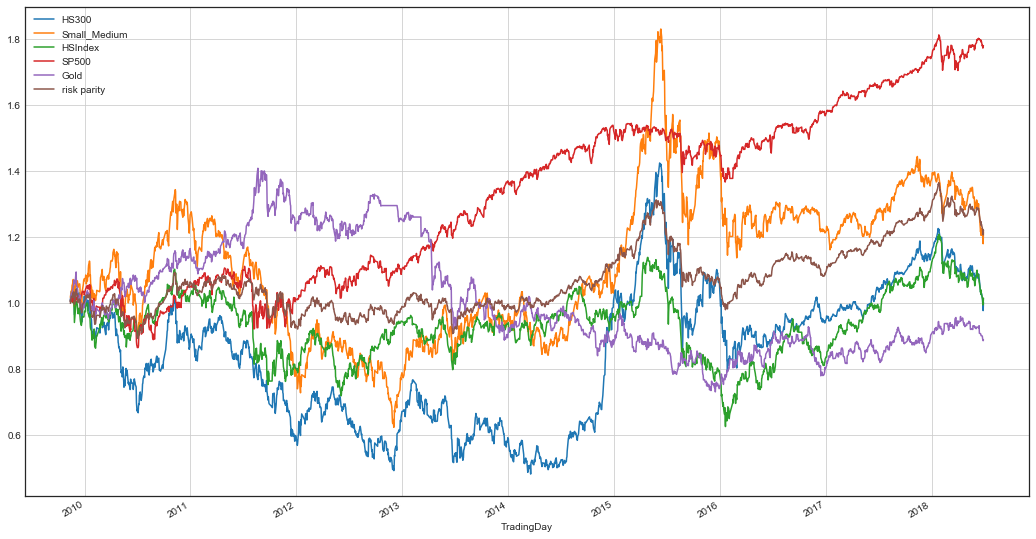

In [247]:
asset_cum_value_plus.plot(figsize=(18,10)).grid(True)

In [233]:
assets_indicators = cal_indicators(data_all.loc[starts:ends])
portfolio_indicators = cal_indicators(portfolio_cum_value.pct_change().dropna().replace(np.inf, np.nan).dropna())
assets_indicators['risk parity'] = portfolio_indicators['risk parity']

In [234]:
assets_indicators

,HS300,Small_Medium,HSIndex,SP500,Gold,risk parity
年化收益率,0.04%,2.56%,0.19%,9.29%,-1.31%,2.97%
年化标准差,23.55%,26.71%,17.58%,14.57%,16.05%,10.77%
夏普值,0,0.1,0.01,0.64,-0.08,0.28
最大回撤,50.26%,54.46%,42.96%,19.37%,52.55%,25.32%


In [248]:
portfolio_indicators

,min variance,risk parity,max diversification,equal weight
年化收益率,4.56%,2.97%,2.05%,2.02%
年化标准差,9.93%,10.77%,11.63%,13.34%
夏普值,0.46,0.28,0.18,0.15
最大回撤,21.10%,25.32%,26.54%,34.11%


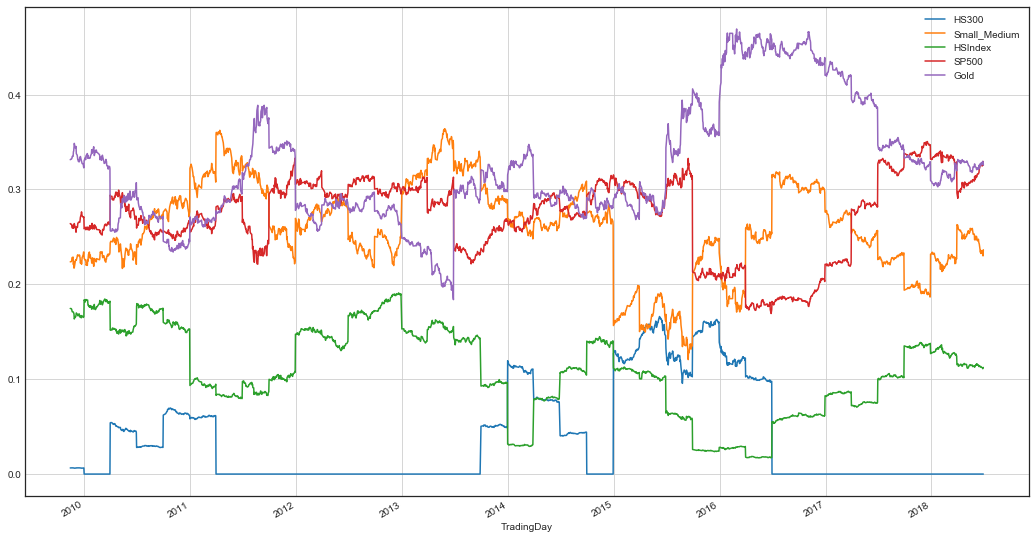

In [254]:
ax = portfolio_positions['max diversification'].plot(figsize=(18,10))
ax.legend( loc='best')
ax.grid()

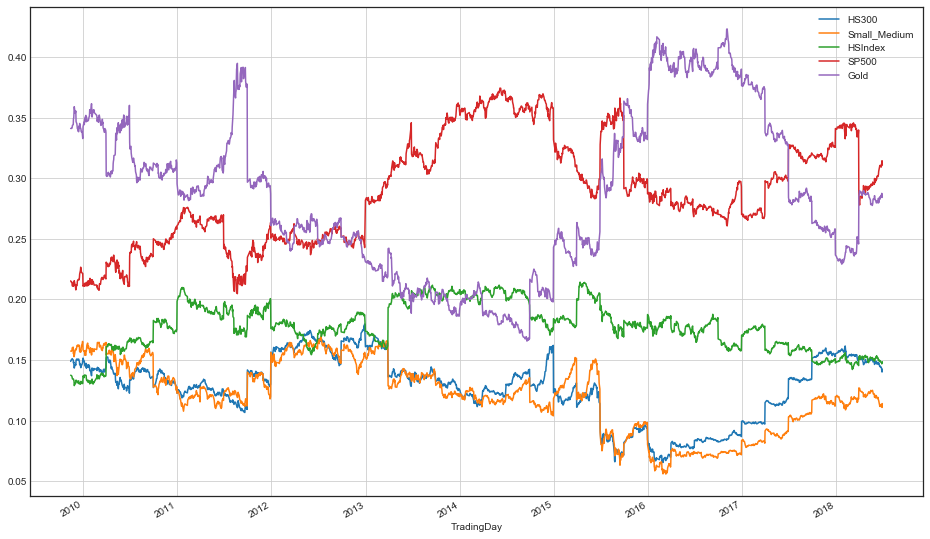

In [268]:
ax = portfolio_positions['risk parity'].plot(figsize=(16,10))
ax.legend(loc='best')
ax.grid()

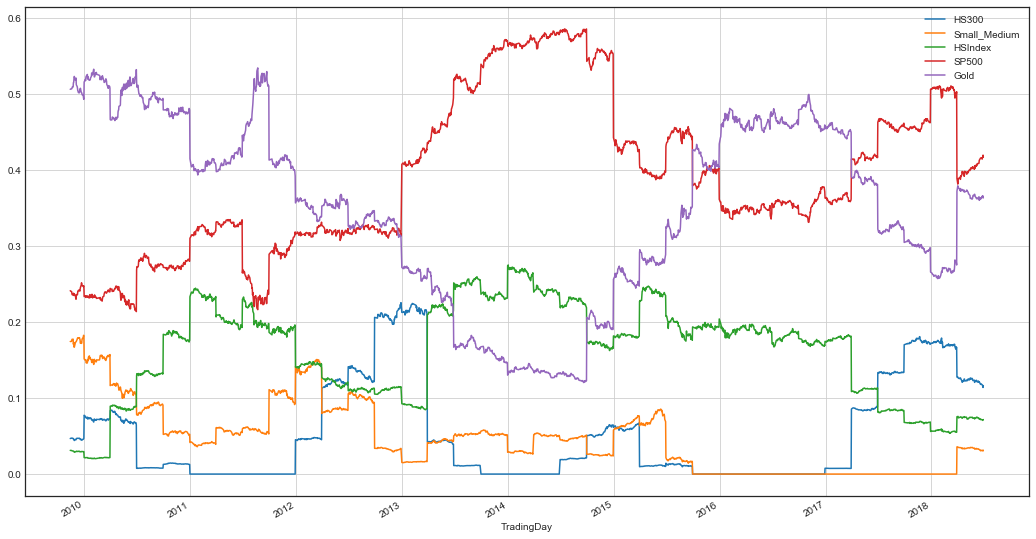

In [252]:
ax = portfolio_positions['min variance'].plot(figsize=(18,10))
ax.legend(loc='best')
ax.grid()

In [261]:
portfolio_positions['risk parity'].head()

,HS300,Small_Medium,HSIndex,SP500,Gold
TradingDay,,,,,
2009-11-13,0.148842,0.157363,0.137419,0.215288,0.341087
2009-11-16,0.150346,0.157201,0.137081,0.214167,0.341205
2009-11-17,0.150387,0.157370,0.136849,0.214273,0.341121
2009-11-18,0.150395,0.157683,0.136352,0.214077,0.341492
2009-11-19,0.151068,0.159984,0.135349,0.211483,0.342117


In [124]:
portfolio_cum_value

,min variance,risk parity,max diversification,equal weight
TradingDay,,,,
2009-11-13,0.000000,0.000000,0.000000,0.000000
2009-11-16,0.000000,0.000000,0.000000,0.000000
2009-11-17,0.000000,0.000000,0.000000,0.000000
2009-11-18,0.000000,0.000000,0.000000,0.000000
2009-11-19,0.000000,0.000000,0.000000,0.000000
2009-11-20,0.000000,0.000000,0.000000,0.000000
2009-11-23,0.000000,0.000000,0.000000,0.000000
2009-11-24,0.000000,0.000000,0.000000,0.000000
2009-11-25,0.000000,0.000000,0.000000,0.000000


In [133]:
portfolio_cum_value.pct_change().dropna().replace(np.inf, np.nan).dropna()

,min variance,risk parity,max diversification,equal weight
TradingDay,,,,
2009-12-02,0.007808,0.007765,0.007114,0.007681
2009-12-03,0.001097,0.001629,0.002188,0.001955
2009-12-04,-0.022095,-0.013893,-0.016790,-0.008506
2009-12-07,-0.000261,0.000449,0.000119,0.001706
2009-12-08,-0.013337,-0.012487,-0.011765,-0.011377
2009-12-09,-0.013240,-0.013298,-0.011646,-0.013085
2009-12-10,0.005548,0.004908,0.004714,0.004728
2009-12-11,-0.001822,0.000001,0.000703,0.001269
2009-12-14,0.004410,0.005594,0.004763,0.006104


In [25]:
a=pd.to_datetime('2018-01-01')

In [32]:
b=a-datetime.timedelta(days=500) 

In [33]:
b

Timestamp('2016-08-19 00:00:00')

In [262]:
a=np.matrix('1 2 7;3 4 8;5 6 9')

In [264]:
a.A1

array([1, 2, 7, 3, 4, 8, 5, 6, 9])